┌ Info: Saved animation to 
│   fn = C:\Julia\output\gp_simulate.gif
└ @ Plots C:\Users\裕亮\.julia\packages\Plots\qZHsp\src\animation.jl:98


Plots.AnimatedGif("C:\\Julia\\output\\gp_simulate.gif")
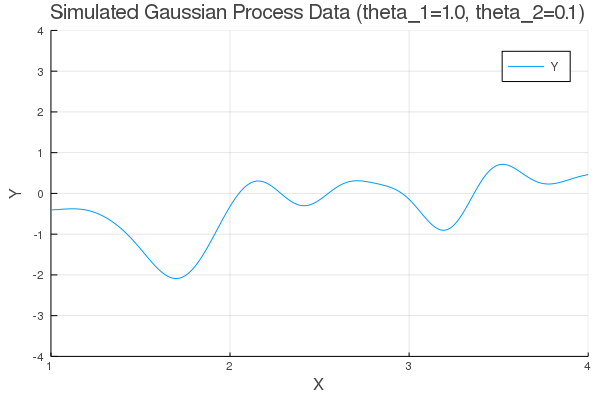

In [1]:
# ガウス過程モデルに従う乱数データを生成するプログラム
# 
# 共分散がθ₁ * exp(-(x-y)^2 / θ₂)である多変量正規分布を生成する
#
# 固有値分解をして，（数値計算上）0未満となっている固有値を0にし，
# 半正定値行列にしている．
#

using Distributions
using Random
using Plots
using LinearAlgebra


# 共分散構造を決めるカーネル関数（Gauss型）
k(x,y; θ₁=1., θ₂= 0.1) = θ₁ * exp(-(x-y)^2 / θ₂)

# 多変量正規分布を生成する関数
function generate_MVN(μ, halfΣ)
    N = length(μ)
    μ + halfΣ * rand(Normal(0, 1), N) 
end

#  本当は連続であるが，離散化して乱数を生成
# サンプリング数
N = 1000
# サンプリング地点
xs = collect(range(1,4,length=N))

# 平均ベクトル
μ=zeros(N)
# 共分散行列
Σ = k.(xs, xs')
# 固有値分解
F = eigen(Σ)
# 固有値のベクトル
M = F.values
# 固有値が0未満は0にする
M[M .< 0] .= 0
# 共分散行列の「平方根」
halfΣ = F.vectors * Diagonal(sqrt.(M))

# 乱数の生成と結果の描画
Random.seed!(12345)
anim = @animate for i in 1:30
    p = plot(xs,generate_MVN(μ, halfΣ), title = "Simulated Gaussian Process Data (theta_1=1.0, theta_2=0.1)", label = "Y",
            xaxis = ("X", (1.0, 4.0), 1:1:4),
            yaxis = ("Y", (-4.0, 4.0), -4:1:4))
end


gif(anim, "C:/Julia/output/gp_simulate.gif", fps = 1.5)

In [ ]:
# ガウス過程モデルに従う乱数データを生成するプログラム
# 
#  データで条件付けたもの
#
# 固有値分解をして，（数値計算上）0未満となっている固有値を0にし，
# 半正定値行列にしている．
#

using Distributions
using Plots
using LinearAlgebra

# 何回も指定するのでθ₁, θ₂ も普通の引数にした
# (よく分かっていない...)
k(x1, x2, θ₁, θ₂) = θ₁ * exp(-(x1 - x2)^2 / θ₂)

# 多変量正規分布を生成する関数
function generate_MVN(μ, halfΣ)
    N = length(μ)
    μ + halfΣ * rand(Normal(0, 1), N) 
end

# データ
# 得られたデータの観測地点
xs = [1., 3.5, 4., 5. ,5.1 ,7., 7.2, 7.3, 8.]
# 得られた観測値
ys = [5., 2., 3., 9. ,1. ,8., 2. , 3. , 1.]
N = length(xs)
xt = range(minimum(xs)-1, stop = maximum(xs)+1, length = N * 300)

θ₁ = 1.0; θ₂ = 0.1; μ = 0

invΣ = inv(Symmetric(k.(xs, xs',θ₁,θ₂)))

# ysで条件付けたときの平均ベクトル
cond_mean = map(x -> (μ .+ k.(x, xs',θ₁,θ₂) * invΣ * (ys .- μ))[1], xt)
# ysで条件付けたときの共分散行列
cond_var = Symmetric(k.(xt, xt',θ₁,θ₂) - k.(xt, xs',θ₁,θ₂) * invΣ * k.(xs, xt',θ₁,θ₂)) 

F = eigen(cond_var)
M = F.values
M[M .< 0] .= 0
half_cond_var = F.vectors * Diagonal(sqrt.(M))


Random.seed!(12345)
anim = @animate for i in 1:30
    p = plot(xt, generate_MVN(cond_mean, half_cond_var), title = "Simulated Gaussian Process Data (theta_1=1.0, theta_2=0.1)", label = "Y",
            xaxis = ("X", (0.0, 9.0), 0.0:1.0:9.0),
            yaxis = ("Y", (-20.0, 20.0), -20.0:5.0:20.0))
   scatter!(p, xs, ys, label = "Observed Y")
end


gif(anim, "C:/Julia/output/gp_conditional_simulate.gif", fps = 1.5)


In [ ]:
using Distributions
using Plots
using LinearAlgebra

# 何回も指定するのでθ₁, θ₂ も普通の引数にした
# (よく分かっていない...)
k(x1, x2, θ₁, θ₂) = θ₁ * exp(-(x1 - x2)^2 / θ₂)

# 多変量正規分布を生成する関数
function generate_MVN(μ, halfΣ)
    N = length(μ)
    μ + halfΣ * rand(Normal(0, 1), N) 
end

# データ
# 得られたデータの観測地点
xs = [1., 3.5, 4., 5. ,5.1 ,7., 7.2, 7.3, 8.]
# 得られた観測値
ys = [5., 2., 3., 9. ,1. ,8., 2. , 3. , 1.]
N = length(xs)
xt = range(minimum(xs)-1, stop = maximum(xs)+1, length = N * 300)

θ₁ = 1.0; θ₂ = 0.1; μ = 0.0

invΣ = inv(Symmetric(k.(xs, xs',θ₁,θ₂)))
cond_mean = map(x -> (μ .+ k.(x, xs',θ₁,θ₂) * invΣ * (ys .- μ))[1], xt)
cond_var = Symmetric(k.(xt, xt',θ₁,θ₂) - k.(xt, xs',θ₁,θ₂) * invΣ * k.(xs, xt',θ₁,θ₂)) 

F = eigen(cond_var)
M = F.values
M[M .< 0] .= 0
half_cond_var = F.vectors * Diagonal(sqrt.(M))


Random.seed!(12345)
p = plot(xt, generate_MVN(cond_mean, half_cond_var), title = "Simulated Gaussian Process Data (theta_1=" * string(θ₁) * " theta_2=" * string(θ₂) * ")", label = "",
            xaxis = ("X", (0.0, 9.0), 0.0:1.0:9.0),
            yaxis = ("Y", (-20.0, 20.0), -20.0:5.0:20.0),
            color = "black",
            seriesalpha = 0.01)
for i in 1:200
    plot!(p, xt, generate_MVN(cond_mean, half_cond_var), color = "black", seriesalpha = 0.03, label = "")
end

scatter!(p, xs, ys, label = "Observed Y")

png(p, "C:/Julia/output/gp_conditional_simulate_transparent.png")

p